<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_YB1%EC%A1%B0_%EC%9E%84%EC%9E%AC%EB%A0%B9_%EA%B0%9C%EB%B4%89%EC%8B%9C%EA%B8%B0%EC%9C%84%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic' #matplotlib 한글 깨짐 방지

In [10]:
train = pd.read_csv('/content/drive/MyDrive/PyColab_ESAA/데이터셋/movies_train.csv')

#### 3-1) 개봉월에 따른 평균 관객 수

In [11]:
train['release_time']=pd.to_datetime(train['release_time'])
train['release_month']=train['release_time'].dt.month

In [14]:
train[['release_month', 'box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending=False)

,box_off_num
release_month,
1,1.365931e+06
12,1.288248e+06
7,1.113807e+06
8,1.029162e+06
9,7.315286e+05
2,6.630252e+05
5,5.756852e+05
6,5.122865e+05
11,4.956539e+05


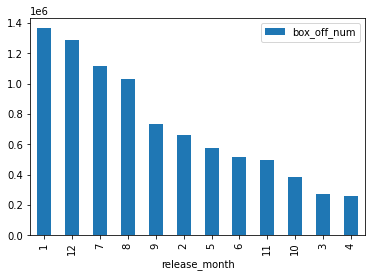

In [15]:
train[['release_month', 'box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending=False).plot(kind='bar')

1. 설연휴인 1월
2. 연말/성탄절인 12월
3. 여름방학 시즌인 7,8월
4. 추석 연휴인 9월  
순으로 관객수가 많은 것으로 나타났다. 

#### 3-2) 개봉시기에 따른 관객 수가 많은 장르

* 관객수가 많은 특정 개봉시기에 어떤 장르가 인기가 많은지 알아보고자 한다. 

>-인기가 많다의 척도는 관객수로 정한다.  
>-관객수가 많은 특정 개봉시기는 다음과 같다. 

>>1. 설연휴인 1월
>>2. 연말/성탄절인 12월
>>3. 여름방학 시즌인 7,8월
>>4. 추석 연휴인 9월  

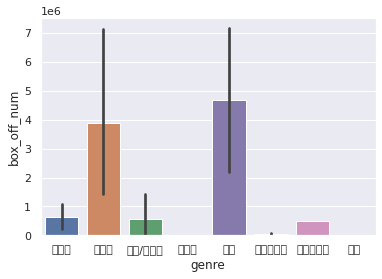

In [ ]:
train_1 = train[train['release_month']==1][['title', 'genre', 'box_off_num']]

ax = plt.subplots()
ax = sns.barplot(x='genre', y='box_off_num', data=train_1)

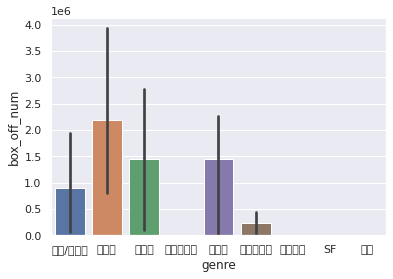

In [ ]:
train_12 = train[train['release_month']==12][['title', 'genre', 'box_off_num']]

ax = plt.subplots()
ax = sns.barplot(x='genre', y='box_off_num', data=train_12)

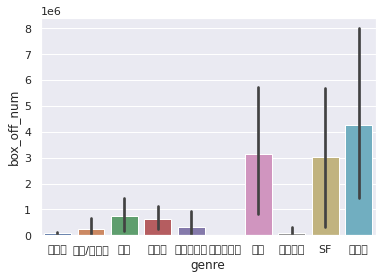

In [ ]:
train_78 = train[(train['release_month']==7) | (train['release_month']==8)][['title', 'genre', 'box_off_num']]

ax = plt.subplots()
ax = sns.barplot(x='genre', y='box_off_num', data=train_78)

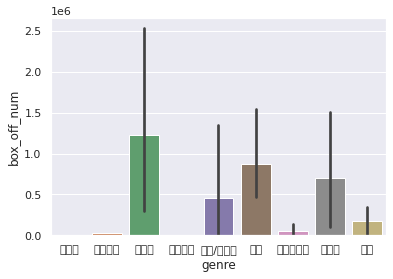

In [ ]:
train_9 = train[train['release_month']==9][['title', 'genre', 'box_off_num']]

ax = plt.subplots()
ax = sns.barplot(x='genre', y='box_off_num', data=train_9)

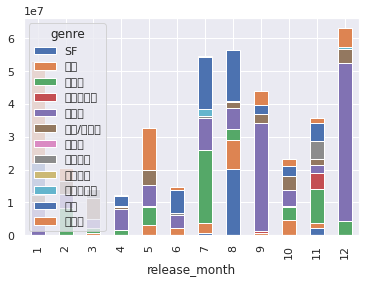

In [ ]:
train_a = train.groupby(['release_month','genre'])['box_off_num'].sum()
a = pd.DataFrame(train_a.reset_index())

a = a.pivot(index='release_month', columns='genre', values='box_off_num')
#a = a.reinedex()
a.plot.bar(stacked=True)

#a = sns.barplot(x='release_month', y='box_num_off', data=a, color='red')
#plt.bar(a['release_month'], a['box_off_num'], stacked=True)
#train_c.plot.bar(x=a['release_month'], stacked=True)
#ax = sns.lmplot(x='release_month', y='box_off_num', hue='genre', data=train_a, fit_reg=False)
#ax = sns.scatter(x='gerne', y='release_num',  data=train_a, fit_reg=False)
